# Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
df.info() # short info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
df.shape

(918, 12)

In [51]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [52]:
df.nunique()  # number of unique values per column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [53]:
df.describe().T # statistical analysis of columns

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Data Visualization

<ipython-input-54-1baa274dc382>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-54-1baa274dc382>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-54-1baa274dc382>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.

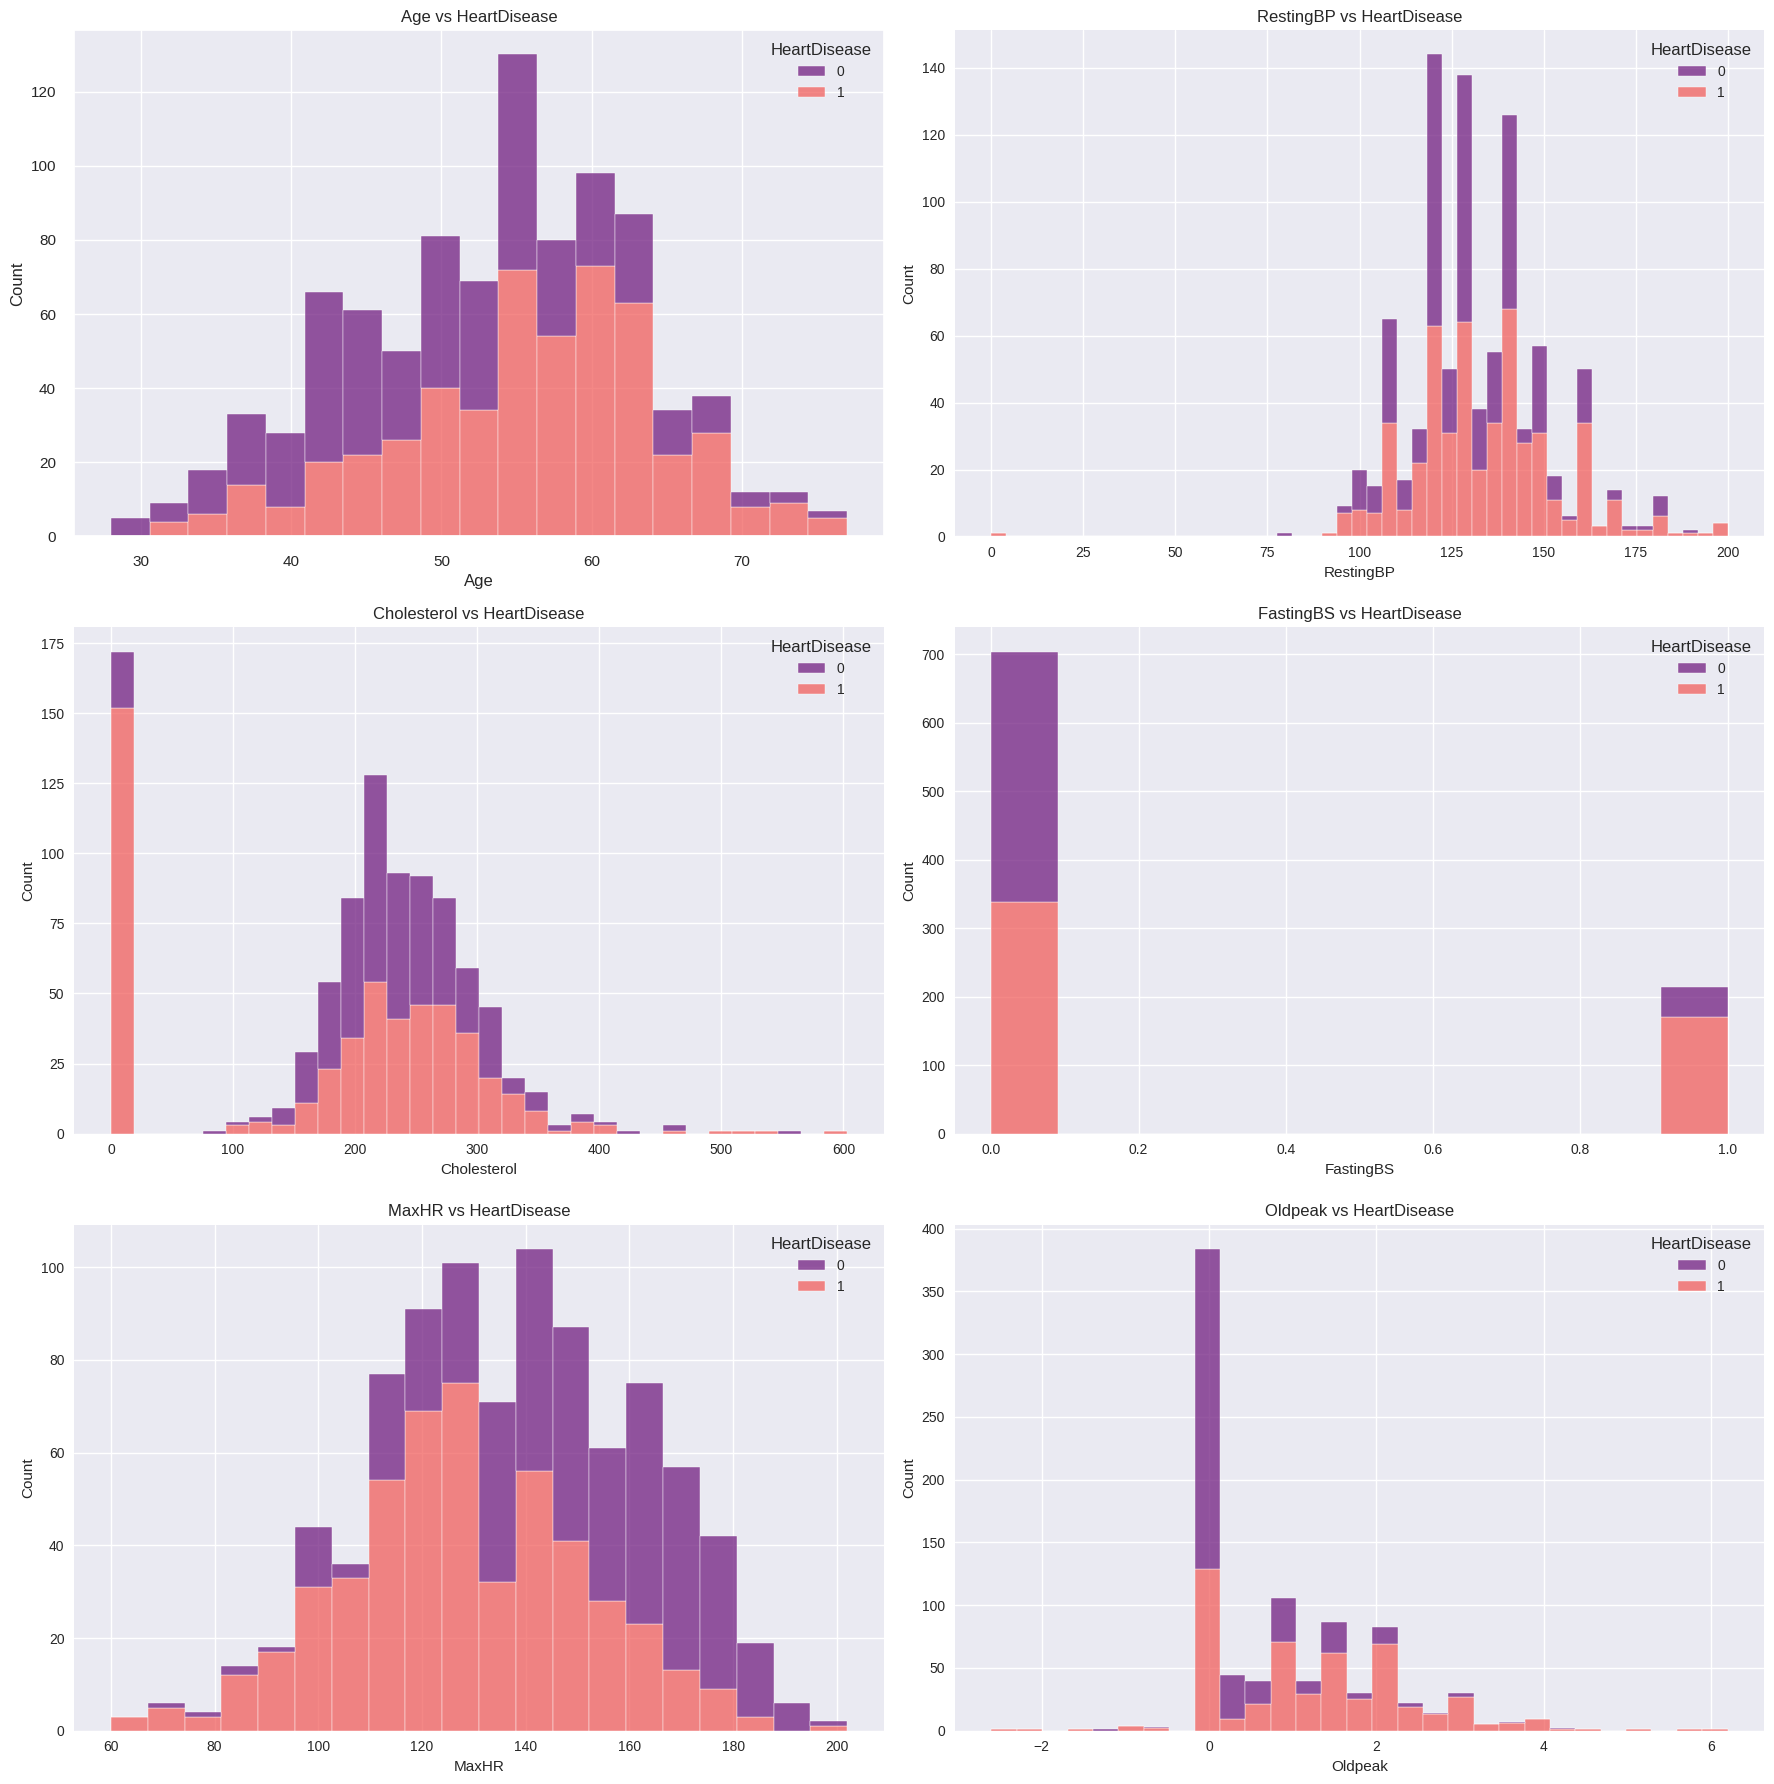

In [54]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

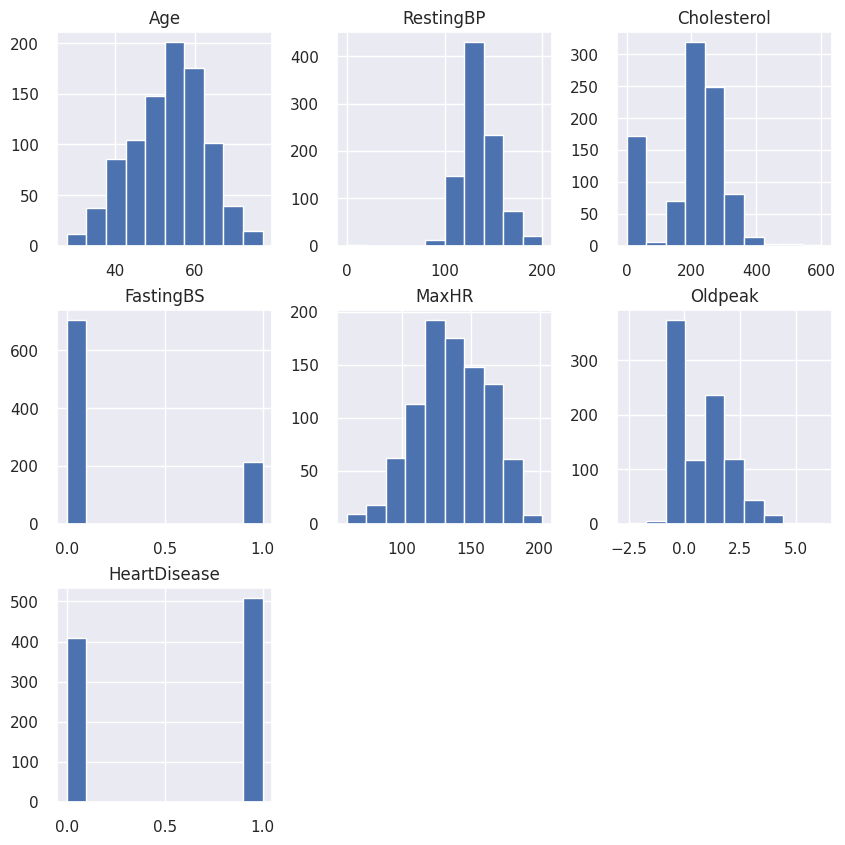

In [55]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

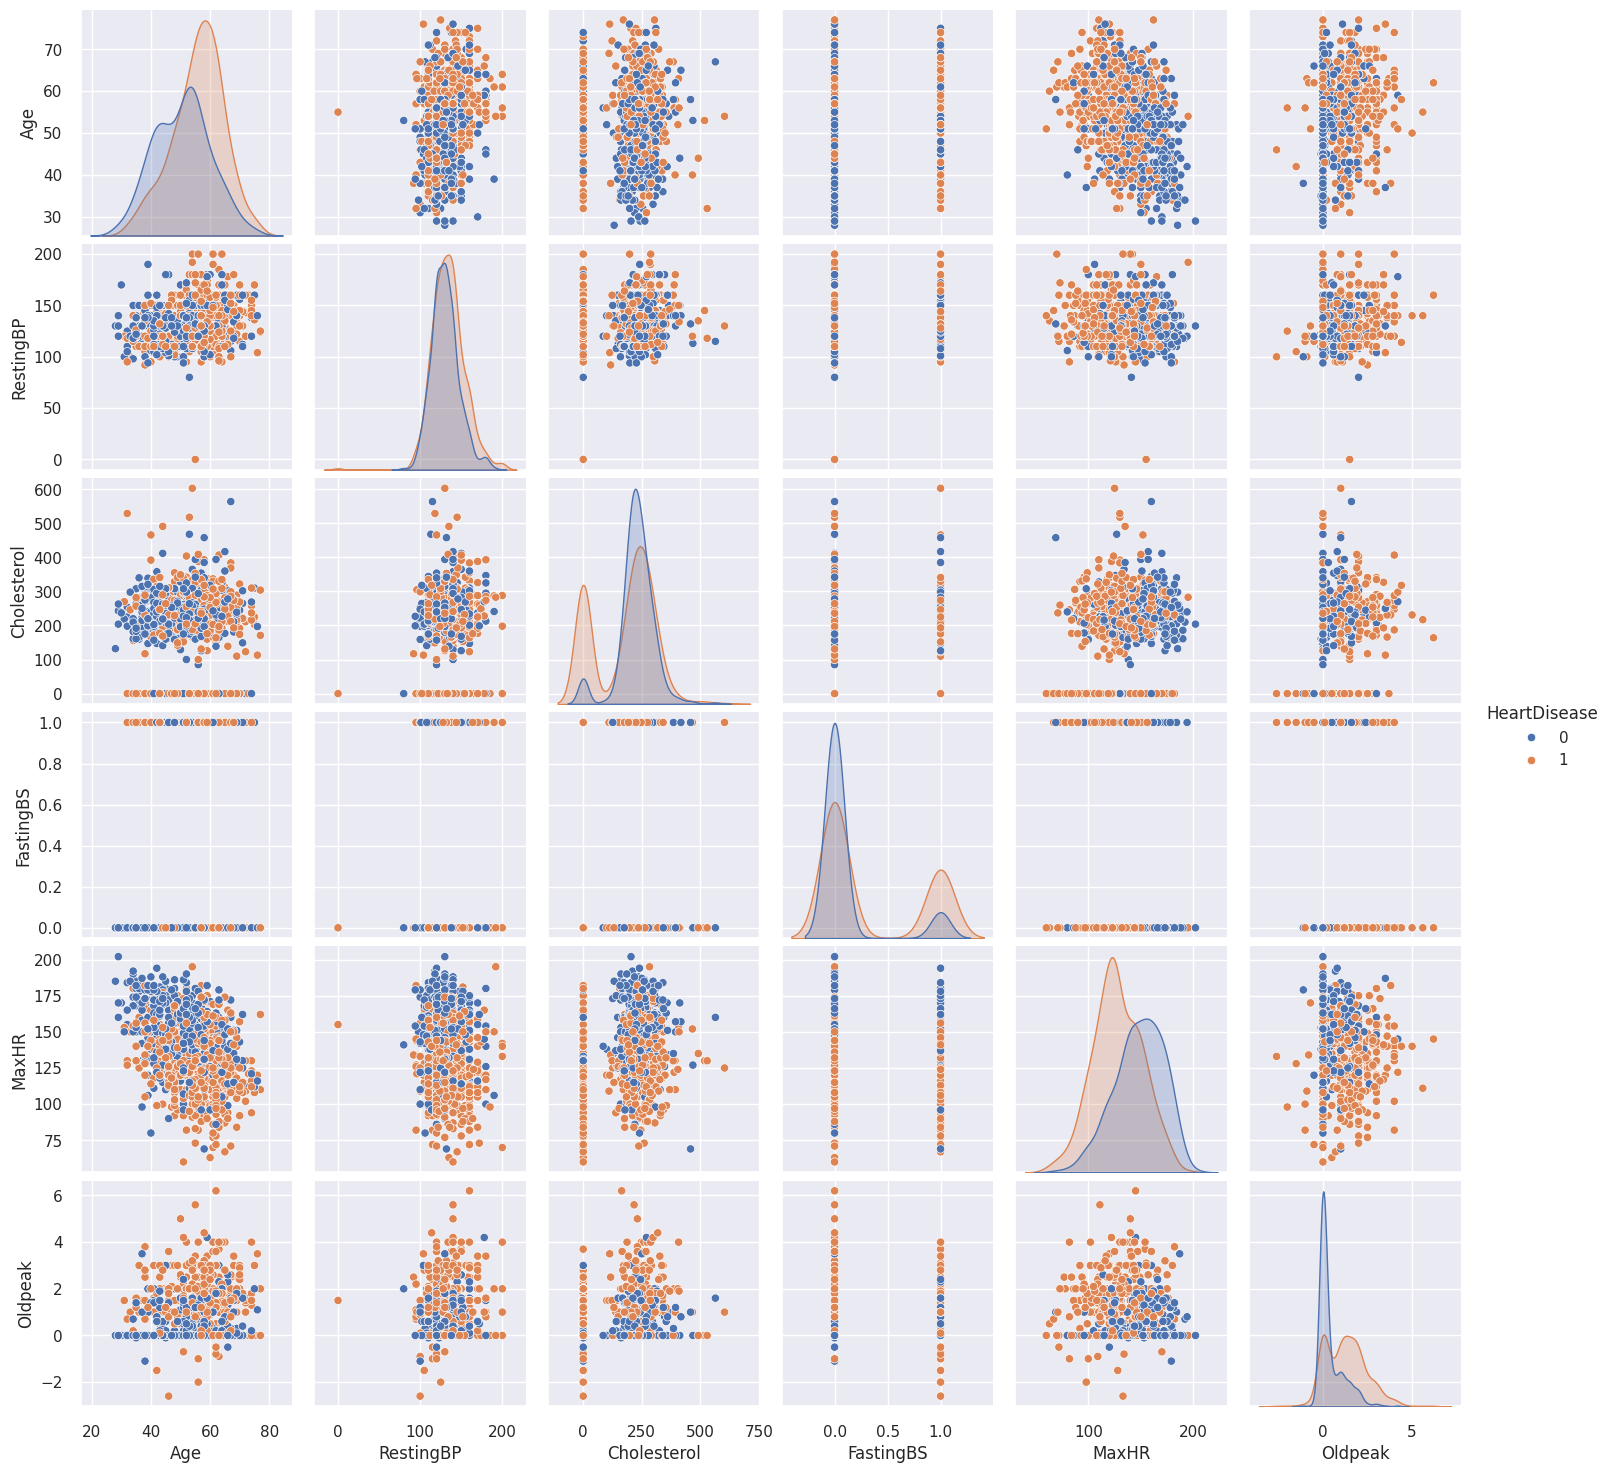

In [56]:
sns.pairplot(df, hue="HeartDisease")

In [57]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [58]:
df1 = df.groupby("Sex").agg({"Age":"mean", "ChestPainType":"count", "RestingBP":"mean", "Cholesterol":"mean", "FastingBS":"sum", "RestingECG":"count", "MaxHR":"mean", "ExerciseAngina":"count", "Oldpeak":"mean", "ST_Slope":"count", "HeartDisease":"sum"})
# Average age for males and females is same


In [59]:
df.shape

(918, 12)

# Label Encoding

Label encoding is a technique used in machine learning and data analysis to convert object and string data into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns_to_encode = ["ChestPainType", "Sex","RestingECG", "ExerciseAngina", "ST_Slope"]
for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])

In [61]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [62]:
df.shape

(918, 12)

# Feature Scaling

Feature scaling is the process of normalizing the range of features in a dataset. Real-world dataasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [63]:
# Check the existing columns in the DataFrame
print(df.columns)

# Ensure the columns exist before attempting to subset
expected_columns = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS',
    'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
    'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal',
    'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

# Check which of these columns are missing
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Proceed only if all expected columns are present
if not missing_columns:
    df = df[expected_columns]
else:
    print("Some columns are missing. Please check the DataFrame.")


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Missing columns: ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
Some columns are missing. Please check the DataFrame.


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [65]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


In [66]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Logistic Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
X = df.drop("HeartDisease", axis=1)
Y = df["HeartDisease"]

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [71]:
model = LogisticRegression(random_state = 2)
model.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=2)

In [72]:
Y_pred = model.predict(X_test_scaled)

In [73]:
accuracy_score(Y_test, Y_pred)

0.8478260869565217

In [74]:
print(confusion_matrix(Y_test, Y_pred))

[[71 18]
 [10 85]]


In [75]:
df.shape

(918, 12)

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming df contains your processed dataset with features and target variable
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8804347826086957
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df contains your processed dataset with features and target variable
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8641304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# CNN

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_scaled, X_test_scaled are already scaled and prepared
input_dim = X_train_scaled.shape[1]  # Number of features in your input

# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Input layer with 64 neurons, relu activation
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons, relu activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron, sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
23/23 [==============================] - 2s 15ms/step - loss: 0.5764 - accuracy: 0.7357 - val_loss: 0.5037 - val_accuracy: 0.8098
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4613 - accuracy: 0.8365 - val_loss: 0.4307 - val_accuracy: 0.8315
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8365 - val_loss: 0.4044 - val_accuracy: 0.8315
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3887 - accuracy: 0.8365 - val_loss: 0.3920 - val_accuracy: 0.8315
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3873 - accuracy: 0.8569 - val_loss: 0.3862 - val_accuracy: 0.8424
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.8529 - val_loss: 0.3899 - val_accuracy: 0.8424
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8638 - val_loss: 0.3865 - val_accuracy: 0.8478
Epoch 8/50
23/23 [=

In [80]:
# Assuming your model has been trained and you have X_test_scaled, y_test ready

# Predict probabilities for each class
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


6/6 [==============================] - 0s 2ms/step
Accuracy: 0.8913043478260869
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.93      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

